# <span style='color:orange'>Olympic Athletes data analysis</span>

>[Click here for Questions](https://docs.google.com/document/d/1PABnGLFw8Hws1mkdsuXUf9duSzuocfLNLfSr_u4RH3I/edit?usp=sharing)

# <span style = 'color:coral'>Level 1</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bios = pd.read_csv('Pandas/datasets/bios.csv')
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [3]:
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


In [4]:
bios.describe()

,athlete_id,height_cm,weight_kg
count,145500.000000,106651.000000,102070.000000
mean,73686.188955,176.333724,71.890996
std,42868.960158,10.380282,14.465540
min,1.000000,127.000000,25.000000
25%,36663.750000,170.000000,62.000000
50%,73302.500000,176.000000,70.000000
75%,110306.250000,183.000000,80.000000
max,149814.000000,226.000000,198.000000


In [6]:
bios.isnull().sum()

athlete_id           0
name                 0
born_date         1807
born_city        34592
born_region      34592
born_country     34592
NOC                  1
height_cm        38849
weight_kg        43430
died_date       111560
dtype: int64

### What percentage of athlete records have missing height or weight?

In [9]:
bios.shape[0]

145500

In [12]:
# total 145500 rows
missing_height_percent =  ((bios['height_cm'].isnull().sum()) / (bios.shape[0])) * 100
missing_height_percent

np.float64(26.700343642611685)

In [13]:
missing_weight_percent = ((bios['weight_kg'].isnull().sum()) / (bios.shape[0])) * 100
missing_weight_percent

np.float64(29.848797250859104)

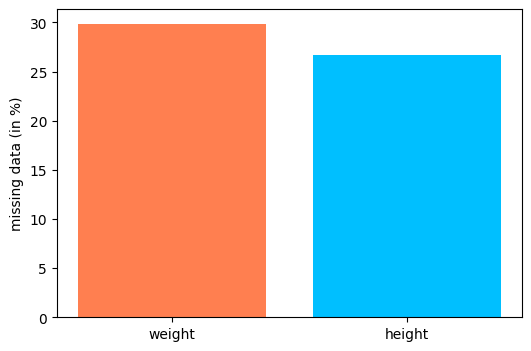

In [15]:
data = {
    'weight':missing_weight_percent,
    'height':missing_height_percent
}
plt.figure(figsize = (6,4))
plt.bar(data.keys(), data.values(), color = ['coral','deepskyblue'])
plt.ylabel('missing data (in %)')
plt.show()

> <span style='color:orange'>weight values are more missing compared to height values</span>

### Which columns suffer the most missing data, and why might that be historically?

In [16]:
bios.isnull().sum().sort_values(ascending=False)

died_date       111560
weight_kg        43430
height_cm        38849
born_city        34592
born_region      34592
born_country     34592
born_date         1807
NOC                  1
athlete_id           0
name                 0
dtype: int64

> <span style='color:orange'>```died_date``` has most missing values because most athletes are alive</span>

### How many athletes are alive vs deceased in the dataset?

In [30]:
alive = bios['died_date'].isnull().sum()
alive

np.int64(111560)

In [31]:
dead = bios.shape[0] - alive
dead

np.int64(33940)

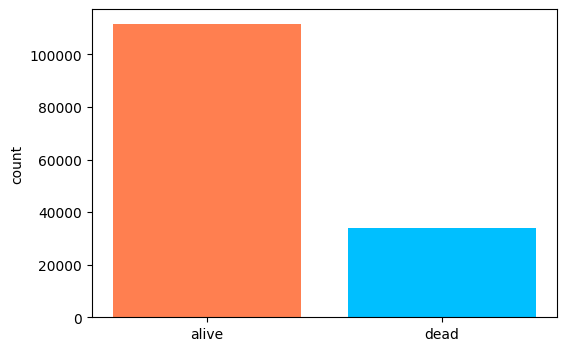

In [32]:
temp = {
    'alive':alive,
    'dead':dead
}
plt.figure(figsize=(6,4))
plt.bar(temp.keys(), temp.values(), color = ['coral','deepskyblue'])
plt.ylabel('count')
plt.show()

> <span style='color:orange'>111560 -> alive, 33940 -> dead</span>

### What is the earliest and latest birth year recorded?

In [34]:
# earliest and latest birth_year
# for this we have to extract birth_year
bios['born_datetime'] = pd.to_datetime(bios['born_date'])
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17


In [36]:
bios['birth_year'] = bios['born_datetime'].dt.year
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,born_datetime,birth_year
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886-12-12,1886.0
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969-04-01,1969.0
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898-08-13,1898.0
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895-05-11,1895.0
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878-04-17,1878.0


In [37]:
bios.pop('born_datetime')
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,birth_year
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1886.0
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1969.0
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1898.0
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1895.0
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1878.0


In [39]:
# earliest and latest birth year
print(bios['birth_year'].min())
print(bios['birth_year'].max())

1828.0
2009.0


> <span style='color:orange'>earliest: 1828, latest: 2009</span>

### Are there duplicate athlete names?

In [41]:
name_count = bios['name'].value_counts()
name_count

name
Ivan Ivanov       13
Luis López         9
José González      9
José Pérez         8
Luis Martínez      7
                  ..
Ada Bolten         1
Klenie Bimolt      1
Toos Beumer        1
Rie Beisenherz     1
Bill Phillips      1
Name: count, Length: 142780, dtype: int64

In [46]:
duplicate_names = name_count[name_count > 1]
duplicate_names.sort_values(ascending = False)

name
Ivan Ivanov        13
José González       9
Luis López          9
José Pérez          8
Luis Martínez       7
                   ..
Joseph Murphy       2
Peter Karlsson      2
Dietmar Schwarz     2
Erik Lindh          2
Julia Marino        2
Name: count, Length: 2193, dtype: int64

> <span style='color:orange'>YES, there are 2193 duplicate names appearing more than 2 times</span>